# Read CSV Files

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

print(titanic_data.columns)
print(test_data.columns)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Prepare Train_Test Data

In [2]:
train_y = titanic_data['Survived']
train_data = titanic_data.drop(columns=['PassengerId', 'Survived'])
train_test_data = pd.concat([train_data, test_data.drop(columns=['PassengerId'])])
train_test_data = train_test_data.reset_index(drop=True)
print('train.shape: ', train_data.shape)
print('test.shape: ', test_data.shape)
print('train_test_data.shape: ', train_test_data.shape)
print(train_test_data.head())

train.shape:  (891, 10)
test.shape:  (418, 11)
train_test_data.shape:  (1309, 10)
   Pclass                                               Name     Sex    Age  \
0       3                            Braund, Mr. Owen Harris    male 22.000   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000   
2       3                             Heikkinen, Miss. Laina  female 26.000   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000   
4       3                           Allen, Mr. William Henry    male 35.000   

   SibSp  Parch            Ticket   Fare Cabin Embarked  
0      1      0         A/5 21171  7.250   NaN        S  
1      1      0          PC 17599 71.283   C85        C  
2      0      0  STON/O2. 3101282  7.925   NaN        S  
3      1      0            113803 53.100  C123        S  
4      0      0            373450  8.050   NaN        S  


# Plot Target Data

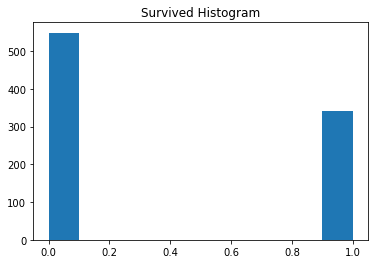

In [3]:
import matplotlib.pyplot as plt

plt.hist(train_y)
plt.title("Survived Histogram")
plt.show()

# Split Numerical and Categorical

In [4]:
data_categorical_pd  = train_test_data.loc[:,train_test_data.dtypes==np.object]
data_numerical_pd  = train_test_data.loc[:,train_test_data.dtypes!=np.object]
print('data_categorical_pd.shape: ', data_categorical_pd.shape)
print('data_numerical_pd.shape: ', data_numerical_pd.shape)

print('data_categorical_pd.columns', data_categorical_pd.columns)
print('data_numerical_pd.columns', data_numerical_pd.columns)

print(data_categorical_pd.info())
print(data_numerical_pd.info())

print(data_categorical_pd['Cabin'].describe())
print(data_numerical_pd['Age'].describe())

data_categorical_pd.shape:  (1309, 5)
data_numerical_pd.shape:  (1309, 5)
data_categorical_pd.columns Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
data_numerical_pd.columns Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1309 non-null   object
 1   Sex       1309 non-null   object
 2   Ticket    1309 non-null   object
 3   Cabin     295 non-null    object
 4   Embarked  1307 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1046 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null

In [5]:
print(data_categorical_pd['Cabin'].value_counts())
print(data_numerical_pd['Age'].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
C22 C26            4
                  ..
B10                1
A5                 1
A11                1
T                  1
B4                 1
Name: Cabin, Length: 186, dtype: int64
24.000    47
22.000    43
21.000    41
30.000    40
18.000    39
          ..
20.500     1
11.500     1
22.500     1
0.330      1
60.500     1
Name: Age, Length: 98, dtype: int64


# Data cleaning - Dealing with null values

In [6]:
# Categorical
data_categorical_withoutnan_pd = data_categorical_pd.copy()

data_categorical_withoutnan_pd['Cabin'] = data_categorical_pd['Cabin'].fillna('None')
fillna_value = data_categorical_pd['Embarked'].mode()[0]
data_categorical_withoutnan_pd['Embarked'] = data_categorical_pd['Embarked'].fillna(fillna_value)

# Numerical
data_numerical_withoutnan_pd = data_numerical_pd.copy()

bool_cabin_nan = data_categorical_pd['Cabin'].isnull()
data_numerical_withoutnan_pd['Cabin_nan'] = bool_cabin_nan.astype('uint8')
bool_age_nan = data_numerical_pd['Age'].isnull()
data_numerical_withoutnan_pd['Age_nan'] = bool_age_nan.astype('uint8')

fillna_value = data_numerical_pd['Fare'].mode()[0]
data_numerical_withoutnan_pd['Fare'] = data_numerical_pd['Fare'].fillna(fillna_value)

male_index = data_categorical_pd['Sex'] == 'male'
female_index = data_categorical_pd['Sex'] == 'female'

age_mean = data_numerical_pd['Age'].mean()
male_age_mean = data_numerical_pd['Age'][male_index].mean()
female_age_mean = data_numerical_pd['Age'][female_index].mean()

print('Age mean:', age_mean)
print('Male age mean:', male_age_mean)
print('Female age mean:', female_age_mean)

null_list = data_numerical_pd['Age'].isnull().values
for index, age in enumerate(data_numerical_pd['Age']):
    if null_list[index]:
        if data_categorical_pd['Sex'][index] == 'male':
            data_numerical_withoutnan_pd['Age'][index] = male_age_mean
        elif data_categorical_pd['Sex'][index] == 'female':
            data_numerical_withoutnan_pd['Age'][index] = female_age_mean

print(data_categorical_withoutnan_pd.info())
print(data_numerical_withoutnan_pd.info())

Age mean: 29.881137667304014
Male age mean: 30.58522796352584
Female age mean: 28.68708762886598
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1309 non-null   object
 1   Sex       1309 non-null   object
 2   Ticket    1309 non-null   object
 3   Cabin     1309 non-null   object
 4   Embarked  1309 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Age        1309 non-null   float64
 2   SibSp      1309 non-null   int64  
 3   Parch      1309 non-null   int64  
 4   Fare       1309 non-null   float64
 5   Cabin_nan  1309 non-null   uint8  
 6   Age_nan    1309 non-null   uint8  
dtypes: float64(2),

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Data cleaning - Dealing with outliers

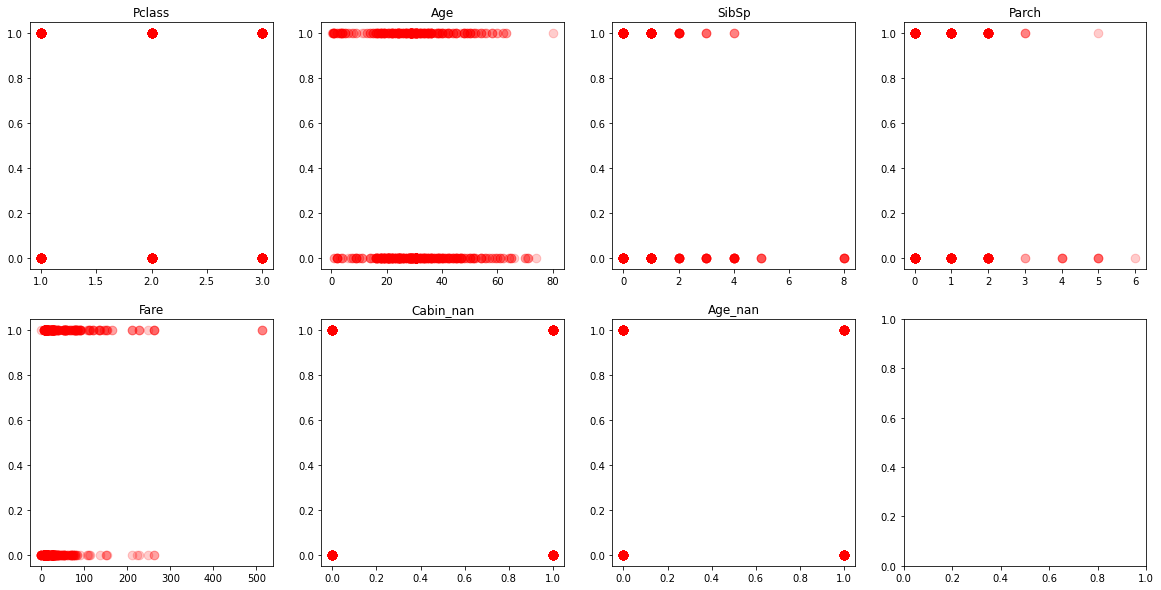

In [7]:
# Numerical

n_cols = round(data_numerical_withoutnan_pd.shape[1] / 4)
fig, ax = plt.subplots(nrows=n_cols, ncols=4, figsize=(20, 10))
i = 0
for row in ax:
    for col in row:
        try:
            col.scatter(x=data_numerical_withoutnan_pd[data_numerical_withoutnan_pd.columns[i]][:891], y=train_y, c='red', s=75, alpha=0.2)
            col.title.set_text(data_numerical_withoutnan_pd.columns[i])
        except:
            break
        i = i + 1
plt.show()

In [8]:
drop_age = (data_numerical_withoutnan_pd['Age']>75) & (train_y==1)
drop_parch = (data_numerical_withoutnan_pd['Parch']>4) & (train_y==1)

print('Index should be lower than 891 because of test set')
print(drop_age[drop_age == True])
print(drop_parch[drop_parch == True])
print(data_numerical_withoutnan_pd['Fare'][drop_age == True])
print(data_numerical_withoutnan_pd['Fare'][drop_parch == True])

data_numerical_dropout_pd = data_numerical_withoutnan_pd.copy()
data_numerical_dropout_pd = data_numerical_dropout_pd.drop(data_numerical_withoutnan_pd[drop_age].index)
data_numerical_dropout_pd = data_numerical_dropout_pd.drop(data_numerical_withoutnan_pd[drop_parch].index)
data_numerical_dropout_pd = data_numerical_dropout_pd.reset_index(drop=True)

data_categorical_dropout_pd = data_categorical_withoutnan_pd.copy()
data_categorical_dropout_pd = data_categorical_dropout_pd.drop(data_categorical_dropout_pd[drop_age].index)
data_categorical_dropout_pd = data_categorical_dropout_pd.drop(data_categorical_dropout_pd[drop_parch].index)
data_categorical_dropout_pd = data_categorical_dropout_pd.reset_index(drop=True)

train_dropout_y = train_y.copy()
train_dropout_y = train_dropout_y.drop(train_y[drop_age].index)
train_dropout_y = train_dropout_y.drop(train_y[drop_parch].index)
train_dropout_y = train_dropout_y.reset_index(drop=True)

Index should be lower than 891 because of test set
630    True
dtype: bool
25    True
dtype: bool
630   30.000
Name: Fare, dtype: float64
25   31.387
Name: Fare, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

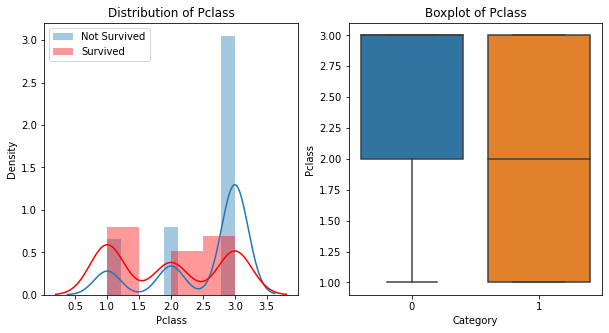

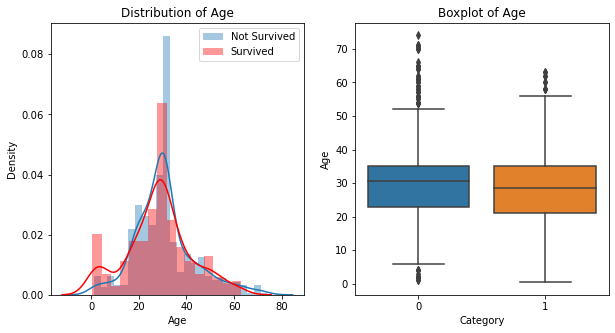

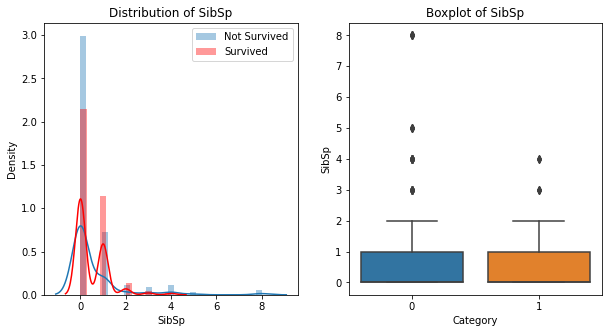

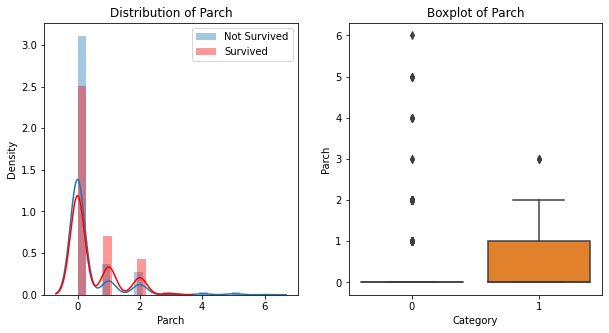

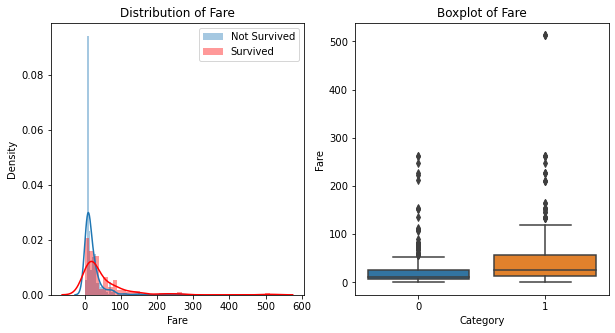

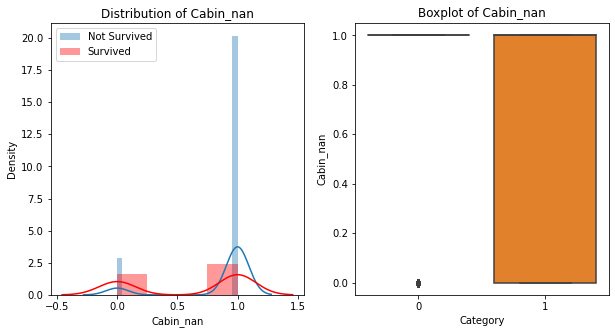

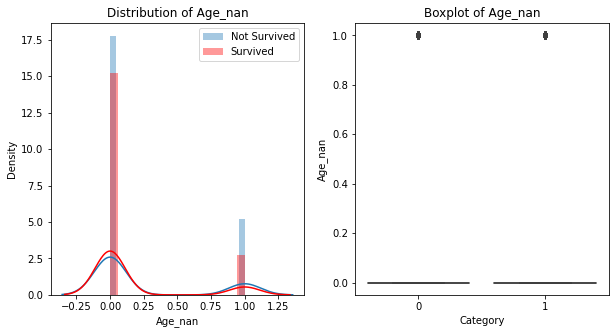

In [9]:
import seaborn as sns

y_plot = train_dropout_y.copy()
y_plot.columns = ['Survived']
Data_plot = pd.concat([data_numerical_dropout_pd[:][:len(y_plot)], y_plot], axis=1)

for feature in data_numerical_dropout_pd.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    plot10 = sns.distplot(Data_plot[Data_plot['Survived']==0][feature],ax=ax1, label='Not Survived')
    sns.distplot(Data_plot[Data_plot['Survived']==1][feature],ax=ax1,color='red', label='Survived')
    plot10.axes.legend()
    ax1.set_title('Distribution of {name}'.format(name=feature))

    sns.boxplot(x='Survived',y=feature,data=Data_plot,ax=ax2)
    ax2.set_xlabel('Category') 
    ax2.set_title('Boxplot of {name}'.format(name=feature))

    fig.show()

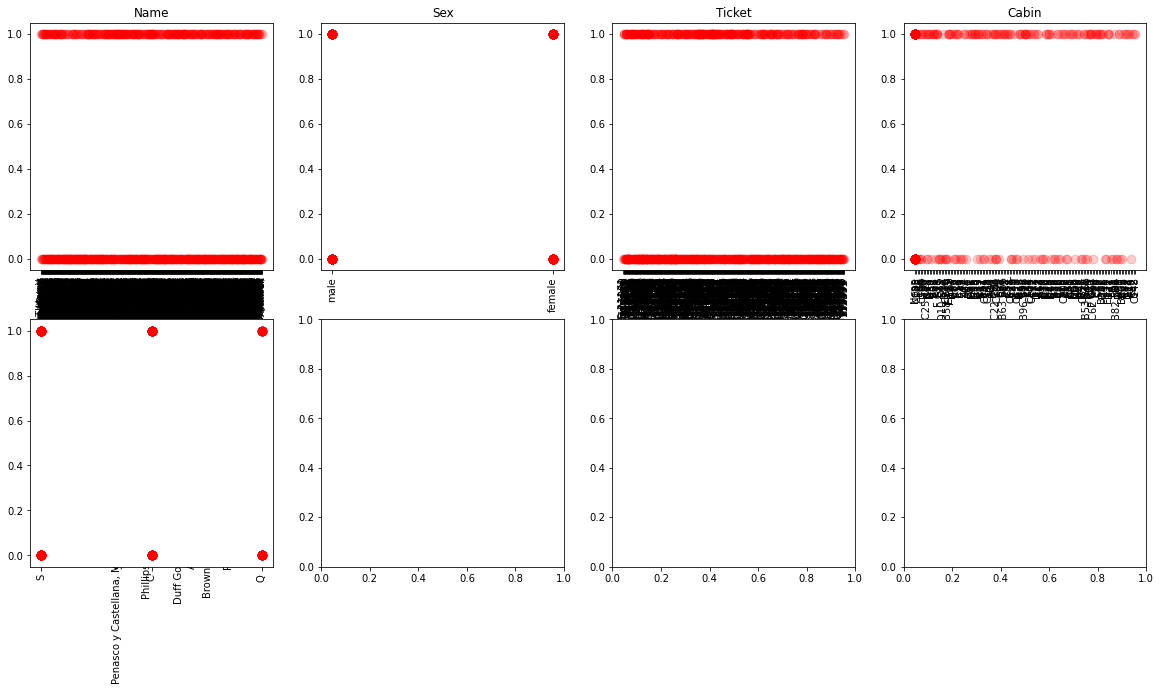

In [10]:
# Categorical

n_cols = round(data_categorical_dropout_pd.shape[1] / 4)
n_cols = n_cols + 1
fig, ax = plt.subplots(nrows=n_cols, ncols=4, figsize=(20, 10))
i = 0
for row in ax:
    for col in row:
        try:
            col.scatter(x=data_categorical_dropout_pd[data_categorical_dropout_pd.columns[i]][:889], y=train_dropout_y, c='red', s=75, alpha=0.2)
            col.title.set_text(data_categorical_dropout_pd.columns[i])
            #col.set_xticklabels(col.get_xticks(), rotation=90)
            col.tick_params(axis='x', labelrotation=90)
        except:
            break
        i = i + 1
plt.show()

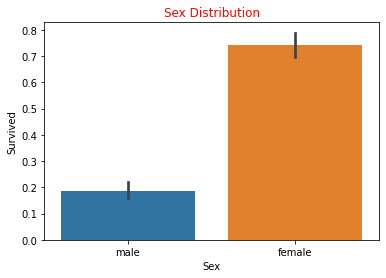

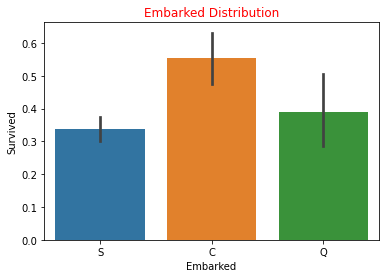

In [11]:
y_plot = train_dropout_y.copy()
y_plot.columns = ['Survived']
data_plot = pd.concat([data_categorical_dropout_pd[:][:len(y_plot)], y_plot], axis=1)

for feature in data_categorical_dropout_pd.columns:
    if len(data_categorical_dropout_pd[feature].unique()) > 10:
        continue
    plt.figure()
    plt.title(feature + ' Distribution', color = 'red')
    sns.barplot(x=feature, y='Survived', data = data_plot)
    plt.show()

# Feature Engineering

In [12]:
# Categorical, Numerical
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

data_categorical_FeaEng_pd = data_categorical_dropout_pd.copy()
data_numerical_FeaEng_pd = data_numerical_dropout_pd.copy()

# Name
name_last = data_categorical_dropout_pd['Name'].str.split(' ', n=1, expand=True)[1]
title = name_last.str.split(' ', n=1, expand=True)[0]
data_categorical_FeaEng_pd['Title'] = title

name_len = data_categorical_dropout_pd['Name'].str.len()
data_numerical_FeaEng_pd['Name_len'] = name_len

tfidf_vec = TfidfVectorizer(max_features=15, token_pattern="\w+")
svd = TruncatedSVD(n_components=10)
tfidf_array = svd.fit_transform(tfidf_vec.fit_transform(data_categorical_dropout_pd["Name"]))
for i in range(tfidf_array.shape[1]):
    data_numerical_FeaEng_pd['Name_' + str(i)] = tfidf_array [:,i]

# Cabin
cabin_first = []
cabin_last = []
cabin_len = []

for cabin in data_categorical_dropout_pd['Cabin']:
    re_list = re.split('(\d+)',cabin)
    if len(re_list) > 1:
        cabin_first.append(re_list[0])
        cabin_last.append(int(re_list[-2]))
        cabin_len.append(len(re_list))
    else:
        cabin_first.append('None')
        cabin_last.append(0)
        cabin_len.append(0)

data_categorical_FeaEng_pd['Cabin_First'] = cabin_first
data_numerical_FeaEng_pd['Cabin_Last'] = cabin_last
data_numerical_FeaEng_pd['Cabin_Len'] = cabin_len

# Ticket
tfidf_vec = TfidfVectorizer(max_features=5, analyzer="char")
svd = TruncatedSVD(n_components=3)
tfidf_array = svd.fit_transform(tfidf_vec.fit_transform(data_categorical_FeaEng_pd["Ticket"]))
for i in range(tfidf_array.shape[1]):
    data_numerical_FeaEng_pd['Ticket_' + str(i)] = tfidf_array [:,i]

# Drops
data_categorical_FeaEng_pd = data_categorical_FeaEng_pd.drop(columns=['Name'])
data_categorical_FeaEng_pd = data_categorical_FeaEng_pd.drop(columns=['Cabin'])
data_categorical_FeaEng_pd = data_categorical_FeaEng_pd.drop(columns=['Ticket'])

print(data_categorical_FeaEng_pd.info())
print(data_numerical_FeaEng_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          1307 non-null   object
 1   Embarked     1307 non-null   object
 2   Title        1307 non-null   object
 3   Cabin_First  1307 non-null   object
dtypes: object(4)
memory usage: 41.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1307 non-null   int64  
 1   Age         1307 non-null   float64
 2   SibSp       1307 non-null   int64  
 3   Parch       1307 non-null   int64  
 4   Fare        1307 non-null   float64
 5   Cabin_nan   1307 non-null   uint8  
 6   Age_nan     1307 non-null   uint8  
 7   Name_len    1307 non-null   int64  
 8   Name_0      1307 non-null   float64
 9   Name_1      1307 non-null   float64
 10

In [13]:
# Categorical
print(data_categorical_FeaEng_pd['Sex'].unique())
print(data_categorical_FeaEng_pd['Embarked'].unique())
print(data_categorical_FeaEng_pd['Title'].unique())
print(data_categorical_FeaEng_pd['Cabin_First'].unique())
print()

# Numerical
print(data_numerical_FeaEng_pd['Pclass'].unique())
print(data_numerical_FeaEng_pd['Age'].unique())
print(data_numerical_FeaEng_pd['SibSp'].unique())
print(data_numerical_FeaEng_pd['Parch'].unique())
print(data_numerical_FeaEng_pd['Fare'].unique())
print(data_numerical_FeaEng_pd['Cabin_nan'].unique())
print(data_numerical_FeaEng_pd['Age_nan'].unique())
print(data_numerical_FeaEng_pd['Cabin_Last'].unique())
print(data_numerical_FeaEng_pd['Cabin_Len'].unique())

['male' 'female']
['S' 'C' 'Q']
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Planke,' 'Don.' 'Rev.' 'Billiard,' 'der'
 'Walle,' 'Dr.' 'Pelsmaeker,' 'Mulder,' 'y' 'Steen,' 'Carlo,' 'Mme.'
 'Impe,' 'Ms.' 'Major.' 'Gordon,' 'Messemaeker,' 'Mlle.' 'Col.' 'Capt.'
 'Velde,' 'the' 'Shawah,' 'Jonkheer.' 'Melkebeke,' 'Cruyssen,' 'Khalil,'
 'Palmquist,' 'Brito,']
['None' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'F G' 'F E']

[3 1 2]
[22.         38.         26.         35.         30.58522796 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         28.68708763 34.         15.
 28.          8.         19.         40.         66.         42.
 21.         18.          3.          7.         49.         29.
 65.         28.5         5.         11.         45.         17.
 32.         16.         25.          0.83       30.         33.
 23.         24.         46.         59.         71.         37.
 47.         14.5        70.5        32.5        12.          9.
 36.5        

# Data cleaning - Label encoding, Drop Constant

In [14]:
# Label Encode
from sklearn.preprocessing import LabelEncoder

data_categorical_encoded_pd = data_categorical_FeaEng_pd.copy()
data_numerical_encoded_pd = data_numerical_FeaEng_pd.copy()
for feature in data_categorical_FeaEng_pd.columns:
        le = LabelEncoder()
        data_categorical_encoded_pd[feature] = le.fit_transform(data_categorical_FeaEng_pd[feature].astype(str))

print(data_categorical_encoded_pd.info())
print(data_numerical_encoded_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sex          1307 non-null   int64
 1   Embarked     1307 non-null   int64
 2   Title        1307 non-null   int64
 3   Cabin_First  1307 non-null   int64
dtypes: int64(4)
memory usage: 41.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1307 non-null   int64  
 1   Age         1307 non-null   float64
 2   SibSp       1307 non-null   int64  
 3   Parch       1307 non-null   int64  
 4   Fare        1307 non-null   float64
 5   Cabin_nan   1307 non-null   uint8  
 6   Age_nan     1307 non-null   uint8  
 7   Name_len    1307 non-null   int64  
 8   Name_0      1307 non-null   float64
 9   Name_1      1307 non-null   float64
 10  Name_2

# Feature Engineering

In [15]:
# Feature Engineering
data_categorical_FFeaEng_pd = data_categorical_encoded_pd.copy()
data_numerical_FFeaEng_pd = data_numerical_encoded_pd.copy()

data_numerical_FFeaEng_pd['Family'] = data_numerical_encoded_pd['SibSp'] + data_numerical_encoded_pd['Parch']
data_numerical_FFeaEng_pd['CabinTotal1'] = data_numerical_encoded_pd['Cabin_Last'] * data_categorical_encoded_pd['Cabin_First']
data_numerical_FFeaEng_pd['CabinTotal2'] = data_numerical_encoded_pd['Cabin_Len'] * data_categorical_encoded_pd['Cabin_First']
data_numerical_FFeaEng_pd['CabinTotal3'] = data_numerical_encoded_pd['Cabin_Last'] * data_numerical_encoded_pd['Cabin_Len']

data_numerical_FFeaEng_pd['PclassFare'] = data_numerical_encoded_pd['Fare'] / data_numerical_encoded_pd['Pclass']
data_numerical_FFeaEng_pd['TitleFare'] = data_categorical_encoded_pd['Title'] * data_numerical_encoded_pd['Fare']
data_numerical_FFeaEng_pd['SexFare'] = data_categorical_encoded_pd['Sex'] * data_numerical_encoded_pd['Fare']
data_numerical_FFeaEng_pd['AgeFare'] = data_numerical_encoded_pd['Age'] * data_numerical_encoded_pd['Fare']

data_numerical_FFeaEng_pd['TitlePclass'] = data_categorical_encoded_pd['Title'] / data_numerical_encoded_pd['Pclass']
data_numerical_FFeaEng_pd['SexPclass'] = data_categorical_encoded_pd['Sex'] / data_numerical_encoded_pd['Pclass']
data_numerical_FFeaEng_pd['AgePclass'] = data_numerical_encoded_pd['Age'] / data_numerical_encoded_pd['Pclass']

data_numerical_FFeaEng_pd['AgeCabinNaN'] = data_numerical_encoded_pd['Age_nan'] * data_numerical_encoded_pd['Cabin_nan']

In [16]:
data_numerical_FFeaEng_pd['FamilyFare'] = data_numerical_FFeaEng_pd['Family'] * data_numerical_encoded_pd['Fare']

data_numerical_FFeaEng_pd['TitleTotal'] = data_numerical_FFeaEng_pd['TitleFare'] * data_numerical_FFeaEng_pd['TitlePclass']
data_numerical_FFeaEng_pd['SexTotal'] = data_numerical_FFeaEng_pd['SexFare'] * data_numerical_FFeaEng_pd['SexPclass']
data_numerical_FFeaEng_pd['AgeTotal'] = data_numerical_FFeaEng_pd['AgeFare'] * data_numerical_FFeaEng_pd['AgePclass']

data_numerical_FFeaEng_pd['CabinTotalFull'] = data_numerical_FFeaEng_pd['CabinTotal1'] + data_numerical_FFeaEng_pd['CabinTotal3']

print(data_categorical_FFeaEng_pd.shape)
print(data_numerical_FFeaEng_pd.shape)

(1307, 4)
(1307, 40)


# Feature Transformation

In [17]:
from sklearn import preprocessing

data_numerical_norm_pd = data_numerical_FFeaEng_pd.copy()
data_categorical_norm_pd = data_categorical_FFeaEng_pd.copy()

for index, feature in enumerate(data_numerical_FFeaEng_pd.columns):
    min_max_scaler = preprocessing.MinMaxScaler()
    
    norm_list = min_max_scaler.fit_transform(
        data_numerical_FFeaEng_pd[data_numerical_FFeaEng_pd.columns[index:index+1]])
    
    data_numerical_norm_pd[feature] = norm_list + 1

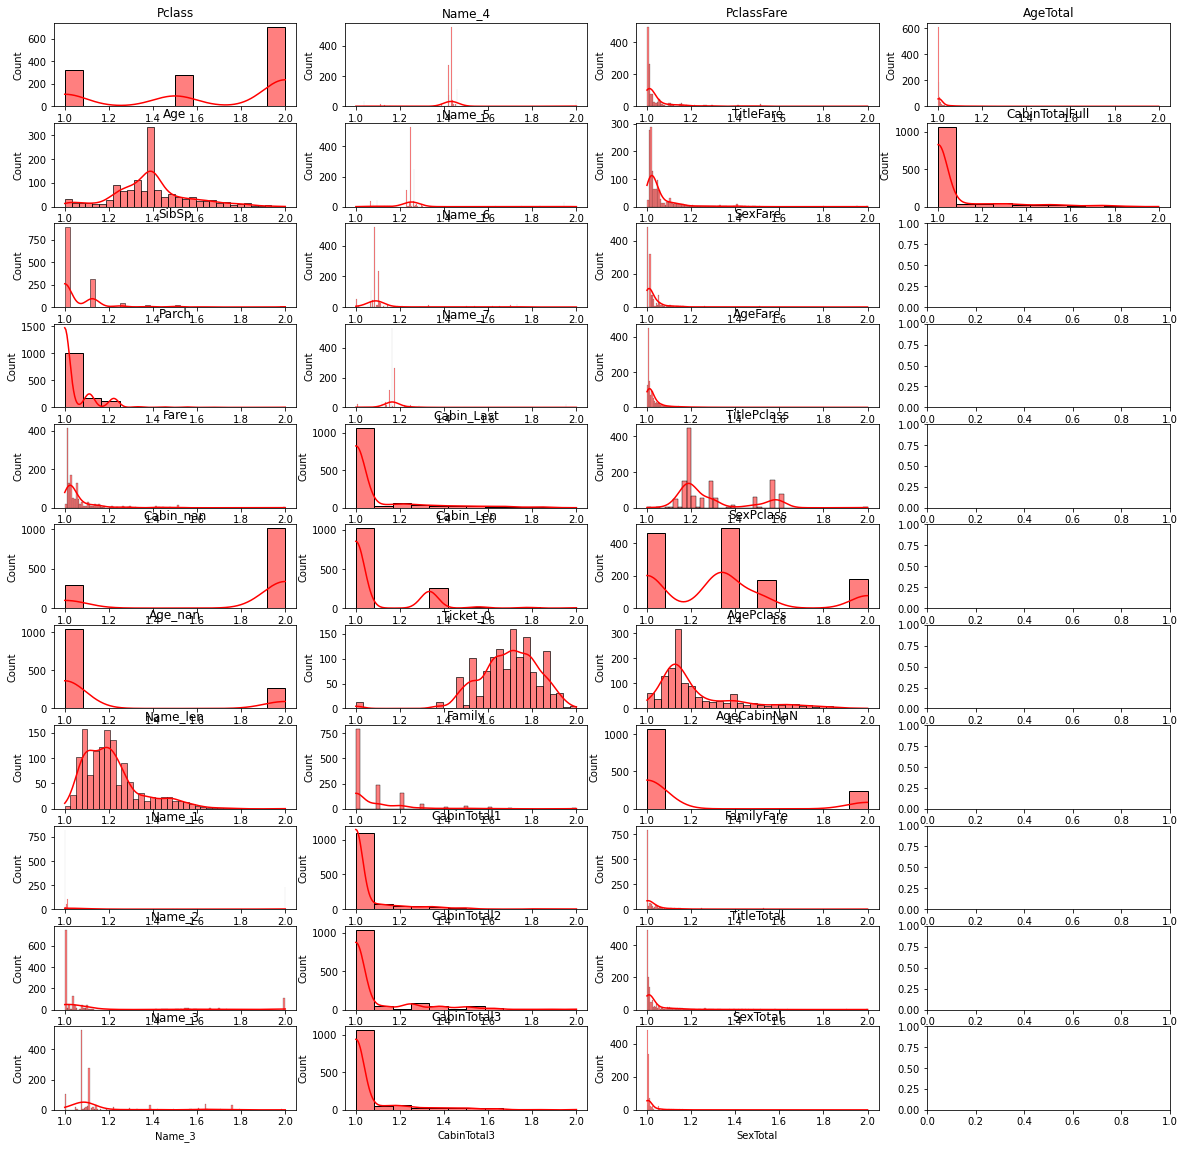

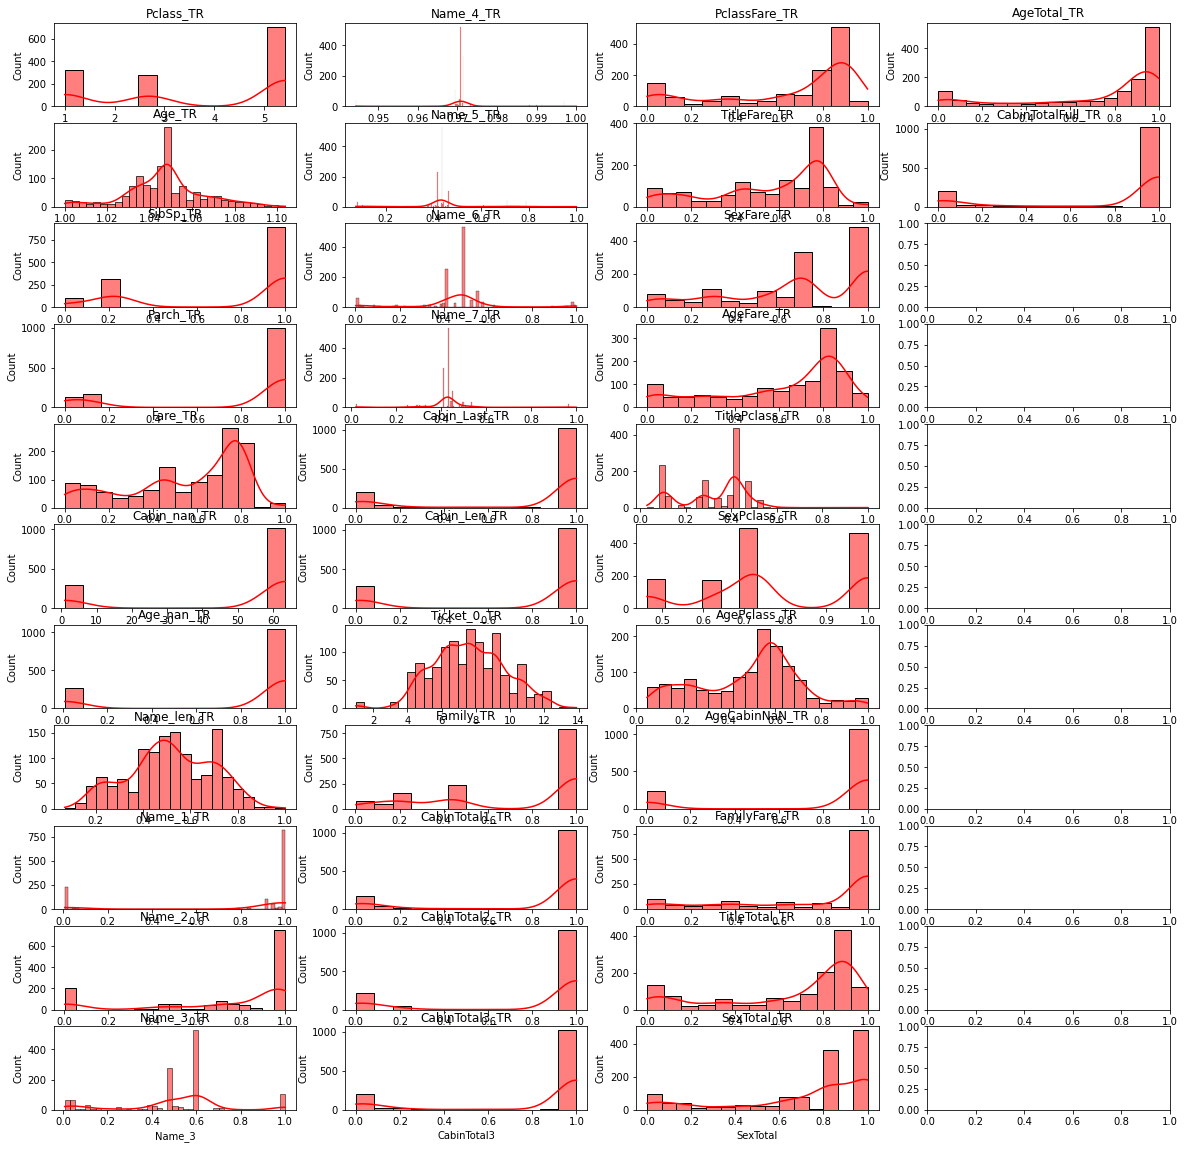

In [18]:
from scipy.stats import skew, boxcox
import seaborn as sns

data_numerical_TR_pd = data_numerical_norm_pd.copy()
data_categorical_TR_pd = data_categorical_norm_pd.copy()

skew_feature_list = []
for feature in data_numerical_norm_pd.columns:
    skew_value = skew(data_numerical_norm_pd[feature])
    if abs(skew_value) > 0.3:
        _, fitted_lambda = boxcox(data_numerical_norm_pd[feature])
        data_numerical_TR_pd[feature] = data_numerical_norm_pd[feature] ** fitted_lambda
        skew_feature_list.append(feature)

n_rows = round(data_numerical_TR_pd.shape[1] / 4)
n_rows = n_rows + 1
fig, axs = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 20))
index = 0
for i in range(4):
    for j in range(n_rows):
        try:
            sns.histplot(data_numerical_norm_pd[skew_feature_list[index]], kde = True, color = 'red', stat = 'count', ax=axs[j][i])
            axs[j][i].title.set_text(skew_feature_list[index])
        except:
            break
        index = index + 1
plt.show()
        
n_rows = round(data_numerical_TR_pd.shape[1] / 4)
n_rows = n_rows + 1
fig, axs = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 20))
index = 0
for i in range(4):
    for j in range(n_rows):
        try:
            sns.histplot(data_numerical_TR_pd[skew_feature_list[index]], kde = True, color = 'red', stat = 'count', ax=axs[j][i])
            axs[j][i].title.set_text(skew_feature_list[index] + '_TR')
        except:
            break
        index = index + 1
plt.show()

# Feature Selection

# Preparation Data For Training

In [19]:
from sklearn.model_selection import train_test_split

X = pd.concat([data_numerical_TR_pd[:][0:889], data_categorical_TR_pd[:][0:889]], axis=1)
X_test = pd.concat([data_numerical_TR_pd[:][889:], data_categorical_TR_pd[:][889:]], axis=1)

print('X shape: ', X.shape)
print('X_test shape: ', X_test.shape)
print(X.head())

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, train_dropout_y, random_state=1)

X shape:  (889, 44)
X_test shape:  (418, 44)
   Pclass   Age  SibSp  Parch  Fare  Cabin_nan  Age_nan  Name_len  Name_0  \
0   5.425 1.037  0.229  1.000 0.800     63.441    1.000     0.570   2.000   
1   1.000 1.059  0.229  1.000 0.126      1.000    1.000     0.182   1.023   
2   5.425 1.043  1.000  1.000 0.783     63.441    1.000     0.598   1.000   
3   1.000 1.055  0.229  1.000 0.208      1.000    1.000     0.234   1.002   
4   5.425 1.055  1.000  1.000 0.780     63.441    1.000     0.544   1.294   

   Name_1  ...  AgeCabinNaN  FamilyFare  TitleTotal  SexTotal  AgeTotal  \
0   1.000  ...        1.000       0.883       0.909     0.844     0.973   
1   0.945  ...        1.000       0.303       0.054     1.000     0.095   
2   0.007  ...        1.000       1.000       0.929     1.000     0.959   
3   0.915  ...        1.000       0.409       0.109     1.000     0.223   
4   0.984  ...        1.000       1.000       0.900     0.828     0.926   

   CabinTotalFull  Sex  Embarked  Title  

# Model Creating and Evaluating

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def scorer(y, y_pred):
    return accuracy_score(y, y_pred)

In [21]:
!pip install -U lightautoml

     |████████████████████████████████| 236 kB 865 kB/s 
     |████████████████████████████████| 232 kB 3.5 MB/s 
     |████████████████████████████████| 204 kB 3.5 MB/s 
     |████████████████████████████████| 424 kB 3.5 MB/s 
     |████████████████████████████████| 1.2 MB 3.8 MB/s 
     |████████████████████████████████| 2.8 MB 4.7 MB/s 
     |████████████████████████████████| 121 kB 7.0 MB/s 
     |████████████████████████████████| 93 kB 909 kB/s 
     |████████████████████████████████| 89 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 90 kB 3.5 MB/s 
     |████████████████████████████████| 96 kB 2.4 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-py3-none-any.whl size=16033 sha256=88fdbeae0413d9952b988cee1b265721ea7d8e0fae7efe599c52307f28c1d2bf
  Stored in directory: /root/.cache/pip/wheels/b7/cc/0d/41d384b0071c6f46e542aded5f8571700ace4f1eb3f1591c29
  Created wheel for json2html: filen

In [22]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

# Model Selection

In [23]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression
log_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
log_score = cross_val_score(log_model, train_X, train_y, scoring='accuracy', cv=5)
print('log_score: ', log_score.mean())

# SVC
svc_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svc_score = cross_val_score(svc_model, train_X, train_y, scoring='accuracy', cv=5)
print('svc_score: ', svc_score.mean())

# GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_score = cross_val_score(gbc_model, train_X, train_y, scoring='accuracy', cv=5)
print('gbc_score: ', gbc_score.mean())

# RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)
rfc_score = cross_val_score(rfc_model, train_X, train_y, scoring='accuracy', cv=5)
print('rfc_score: ', rfc_score.mean())

# XGBClassifier
xgbc_model = XGBClassifier(min_child_weight=0.1, reg_lambda=100, booster='gbtree', objective='binary:logitraw', random_state=42)
xgbc_score = cross_val_score(xgbc_model, train_X, train_y, scoring='accuracy', cv=5)
print('xgbc_score: ', xgbc_score.mean())

# LGBMClassifier
ligthgbmc_model = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)
ligthgbmc_score = cross_val_score(ligthgbmc_model, train_X, train_y, scoring='accuracy', cv=5)
print('ligthgbmc_score: ', ligthgbmc_score.mean())

# CatBoostClassifier
cbc_model = CatBoostClassifier(loss_function='Logloss', random_state=42, verbose=False)
cbc_score = cross_val_score(cbc_model, train_X, train_y, scoring='accuracy', cv=5)
print('cbc_score: ', cbc_score.mean())

# AdaBoostClassifier
abc_model = AdaBoostClassifier(random_state=42)
abc_score = cross_val_score(abc_model, train_X, train_y, scoring='accuracy', cv=5)
print('abc_score: ', abc_score.mean())

# KNeighborsClassifier
neigh_model = KNeighborsClassifier(n_neighbors=3)
neigh_score = cross_val_score(neigh_model, train_X, train_y, scoring='accuracy', cv=5)
print('neigh_score: ', neigh_score.mean())

log_score:  0.8093367747727527
svc_score:  0.8092918864324993
gbc_score:  0.8258444619010212
rfc_score:  0.8318482774099427
xgbc_score:  0.8183368869936034
ligthgbmc_score:  0.8153293681966108
cbc_score:  0.8183144428234768
abc_score:  0.7837840870833801
neigh_score:  0.8033329592638312


# Select Model Parameters

In [24]:
## Liner Model
# LogisticRegression
log_params = {
    'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
log_params_best = {
    'penalty' : ['l1'],
    'C': [1.623776739188721],
    'solver': ['liblinear']
}

## NonLinear Model
# SVC
svc_params = {
    'svc__C' : [9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16],
    'svc__gamma' : [0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.0011, 0.0013, 0.0015, 0.0017, 0.0019, 0.0021],
}
svc_params_best = {
    'svc__C' : [15],
    'svc__gamma' : [0.0015],
}

## Tree Model
# GradientBoostingClassifier
gbc_params = {
    'learning_rate' : [0.001, 0.01, 0.10, 0.15, 0.3, 0.5, 0.1, 0.15, 0.2],
    'n_estimators' : [50, 100, 300,500, 1000, 1500, 2000, 2500, 3000, 3500],
    'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    'criterion': ['friedman_mse',  'mae'],
    'min_samples_split': np.linspace(0.1, 0.5, 12),
    'min_samples_leaf': np.linspace(0.1, 0.5, 12),
    'max_depth' : [2, 4, 6, 8],
    'max_features': ['log2','sqrt']
}
gbc_params_best = {
    'learning_rate' : [0.01],
    'n_estimators' : [2500],
    'subsample': [0.85],
    'criterion': ['friedman_mse'],
    'min_samples_split': [0.1],
    'min_samples_leaf': [0.13636363636363638],
    'max_depth' : [6],
    'max_features': ['sqrt']
}

# RandomForestClassifier
rfc_params = {
    'n_estimators' : [500, 1000, 1500, 2000, 2500, 3000, 3500],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4, 6, 8, 12, 18, 24],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rfc_params_best = {
    'n_estimators' : [1500],
    'criterion' : ['entropy'],
    'max_depth' : [8],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'bootstrap': [True]
}

# XGBClassifier
xgbc_params = {
    'booster' : ['gbtree'],
    'objective' : ['binary:logistic', 'binary:logitraw'], 
    'learning_rate' : [0.001, 0.01, 0.10, 0.15, 0.3, 0.5, 0.1, 0.2],
    'n_estimators' : [100, 500, 1000, 1500, 2000, 2500],
    'max_depth' : [2, 4, 6, 8],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'min_child_weight': [0.25, 0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'colsample_bylevel': [0.4, 0.6, 0.8, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
}

# LGBMClassifier
lgbmc_params = {
    'max_depth' : [2, 4, 6, 8],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [50, 100, 300, 500, 1000, 1500],
    'lambda_l1' : [0, 0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.1, 0.2, 0.4, 0.6, 0.8],
    'min_child_samples' : [3, 5, 10, 20, 25],
    'reg_lambda': [0, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
}

lgbmc_params_best = {
    'max_depth' : [6],
    'learning_rate' : [0.001],
    'n_estimators' : [1000],
    'lambda_l1' : [0.0001],
    'lambda_l2' : [0.0001],
    'feature_fraction' : [0.4],
    'min_child_samples' : [5],
    'reg_lambda': [0]
}

# CatBoostClassifier
cbc_params = {
    'loss_function' : ['Logloss', 'AUC'],
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600, 2000],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2],
    'l2_leaf_reg' : [0.001, 0.01, 0.1, 1, 3],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [1, 2, 5, 10, 15, 20],
    'rsm' : [0.3, 0.5, 0.7, 0.9, 1]
}

cbc_params_best = {
    'loss_function' : ['Logloss'],
    'n_estimators' : [1600],
    'learning_rate' : [0.01],
    'l2_leaf_reg' : [0.1],
    'random_strength' : [0.5],
    'max_depth' : [3],
    'min_child_samples' : [10],
    'rsm' : [0.9]
}

# AdaBoostClassifier
abc_params = {
    'learning_rate' : [0.001, 0.01, 0.10, 0.15, 0.3, 0.5, 0.1],
    'n_estimators' : [500, 1000, 1500, 2000, 2500, 3000, 3500],
    'algorithm' : ['SAMME', 'SAMME.R']
}

abc_params_best = {'n_estimators': [1500], 
                   'learning_rate': [0.1], 
                   'algorithm': ['SAMME.R']}

# KNeighborsClassifier
knn_params = {
    'n_neighbors' : [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [25]:
#log_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
log_model = LogisticRegression(random_state=42)
svc_model = make_pipeline(StandardScaler(), SVC(random_state=42))
gbc_model = GradientBoostingClassifier(random_state=42)
rfc_model = RandomForestClassifier(random_state=42)
xgbc_model = XGBClassifier(random_state=42)
lgbmc_model = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)
cbc_model = CatBoostClassifier(allow_writing_files=False, logging_level='Silent', random_state=42)
abc_model = AdaBoostClassifier(random_state=42)
knn_model = KNeighborsClassifier()
automl_model = TabularAutoML(task = Task('binary', metric='accuracy'))

# Fit and Evaluate Models

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Log
log_grid = GridSearchCV(log_model, log_params_best, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(train_X, train_y)

print('log_grid.best_params_: ', log_grid.best_params_)
print('log_grid score: ', scorer(val_y, log_grid.best_estimator_.predict(val_X)))

# SVC
svc_grid = GridSearchCV(svc_model, svc_params_best, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(train_X, train_y)

print('svc_grid.best_params_: ', svc_grid.best_params_)
print('svc_grid score: ', scorer(val_y, svc_grid.best_estimator_.predict(val_X)))

# GradientBoostingClassifier
gbc_grid = RandomizedSearchCV(gbc_model, param_distributions=gbc_params_best, n_iter=1, cv=5, 
                              scoring='accuracy', random_state=42, n_jobs=-1)
gbc_grid.fit(train_X, train_y)

print('gbc_grid.best_params_: ', gbc_grid.best_params_)
print('gbc_grid score: ', scorer(val_y, gbc_grid.best_estimator_.predict(val_X)))

# RandomForestClassifier
rfc_grid = RandomizedSearchCV(rfc_model, param_distributions=rfc_params_best, n_iter=1, cv=5, 
                              scoring='accuracy', random_state=42, n_jobs=-1)
rfc_grid.fit(train_X, train_y)

print('rfc_grid.best_params_: ', rfc_grid.best_params_)
print('rfc_grid score: ', scorer(val_y, rfc_grid.best_estimator_.predict(val_X)))

# XGBClassifier
#xgbc_grid = RandomizedSearchCV(xgbc_model, param_distributions=xgbc_params, n_iter=100, cv=5, 
#                              scoring='accuracy', random_state=42, n_jobs=-1)
#xgbc_grid.fit(train_X, train_y)

#print('xgbc_grid.best_params_: ', xgbc_grid.best_params_)
#print('xgbc_grid score: ', scorer(val_y, xgbc_grid.best_estimator_.predict(val_X)))

xgbc_clf = XGBClassifier()
xgbc_clf.fit(train_X, train_y, eval_metric=["auc", "logloss"], verbose=True)

print('xgbc_clf: ')
print('xgbc_clf score: ', scorer(val_y, xgbc_clf.predict(val_X)))

threshold = 0.4
xgbc_val_prob = xgbc_clf.predict_proba(val_X)
xgbc_val_prob = pd.DataFrame(xgbc_val_prob)[1]
xgbc_val_prob = [1 if x >= threshold else 0 for x in xgbc_val_prob]

print('xgbc_val_prob score th 0.4: ', scorer(val_y, xgbc_val_prob))

# LGBMRegressor
lgbmc_grid = RandomizedSearchCV(lgbmc_model, param_distributions=lgbmc_params_best, n_iter=1, cv=5, 
                                  scoring='accuracy', random_state=42, n_jobs=-1)
lgbmc_grid.fit(train_X, train_y)

print('lgbmc_grid.best_params_: ', lgbmc_grid.best_params_)
print('lgbmc_grid score: ', scorer(val_y, lgbmc_grid.best_estimator_.predict(val_X)))


# CatBoostRegressor
cbc_grid = RandomizedSearchCV(cbc_model, param_distributions=cbc_params_best, n_iter=1, cv=5, 
                                scoring='accuracy', random_state=42, n_jobs=-1)
cbc_grid.fit(train_X, train_y)

print('cbc_grid.best_params_: ', cbc_grid.best_params_)
print('cbc_grid score: ', scorer(val_y, cbc_grid.best_estimator_.predict(val_X)))

# AdaBoostClassifier
abc_grid = RandomizedSearchCV(abc_model, param_distributions=abc_params_best, n_iter=1, cv=5, 
                                scoring='accuracy', random_state=42, n_jobs=-1)
abc_grid.fit(train_X, train_y)

print('abc_grid.best_params_: ', abc_grid.best_params_)
print('abc_grid score: ', scorer(val_y, abc_grid.best_estimator_.predict(val_X)))

# KNeighborsClassifier
knn_grid = RandomizedSearchCV(knn_model, param_distributions=knn_params, n_iter=1, cv=5, 
                                scoring='accuracy', random_state=42, n_jobs=-1)
knn_grid.fit(train_X, train_y)

print('knn_grid.best_params_: ', knn_grid.best_params_)
print('knn_grid score: ', scorer(val_y, knn_grid.best_estimator_.predict(val_X)))

# TabularAutoML
train_y.columns = ['Survived']
#TabularAutoML_train = pd.concat([train_X[:][:len(train_y)], train_y], axis=1)
#automl_pred = automl_model.fit_predict(TabularAutoML_train, roles = {'target': 'Survived'})

#print('TabularAutoML')
#print('TabularAutoML score: ', scorer(val_y, automl_model.predict(val_X)))

log_grid.best_params_:  {'C': 1.623776739188721, 'penalty': 'l1', 'solver': 'liblinear'}
log_grid score:  0.8385650224215246
svc_grid.best_params_:  {'svc__C': 15, 'svc__gamma': 0.0015}
svc_grid score:  0.8609865470852018
gbc_grid.best_params_:  {'subsample': 0.85, 'n_estimators': 2500, 'min_samples_split': 0.1, 'min_samples_leaf': 0.13636363636363638, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
gbc_grid score:  0.852017937219731
rfc_grid.best_params_:  {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
rfc_grid score:  0.8385650224215246
xgbc_clf: 
xgbc_clf score:  0.8161434977578476
xgbc_val_prob score th 0.4:  0.820627802690583
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value:

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

log_model = LogisticRegression(penalty='l1', C=1.623776739188721, solver='liblinear', random_state=42)
svc_model = make_pipeline(StandardScaler(), SVC(C=15, gamma=0.0015, random_state=42))
gbc_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2500, subsample=0.85, criterion='friedman_mse', min_samples_split=0.1,
                                        min_samples_leaf=0.13636363636363638, max_depth=6, max_features='sqrt', random_state=42)
abc_model = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1, algorithm='SAMME.R', random_state=42)

estimators = [
            ('log', log_model),
            ('svc', svc_model),
            ('gbc', gbc_model),
            ('abc', abc_model)
]

stacked_clf_calib = StackingClassifier(estimators=estimators)
stacked_clf_calib.fit(train_X, train_y)

print('stacked_clf_calib score: ', scorer(val_y, stacked_clf_calib.predict(val_X)))

test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

### Find Threshold
pred_proba = stacked_clf_calib.predict_proba(val_X)[:,1]
# ROC
fpr, tpr, thresholds = roc_curve(val_y, pred_proba)
gmeans = np.sqrt(tpr * (1-fpr))
ix_gmeans = np.argmax(gmeans)
print('\nBest Threshold=%f, G-Mean=%.3f\n' % (thresholds[ix_gmeans], gmeans[ix_gmeans]))
predictions_roc = np.where(pred_proba > thresholds[ix_gmeans], 1, 0)
print('predictions_roc score: ', scorer(val_y, predictions_roc))

# Precision-Recall
precision, recall, thresholds = precision_recall_curve(val_y, pred_proba)
fscore = (2 * precision * recall) / (precision + recall)
ix_fscore = np.argmax(fscore)
print('\nBest Threshold=%f, F-Score=%.3f\n' % (thresholds[ix_fscore], fscore[ix_fscore]))
predictions_precision_recall = np.where(pred_proba > thresholds[ix_fscore], 1, 0)
print('predictions_precision_recall score: ', scorer(val_y, predictions_precision_recall))

### Calirated
calibrated_clf = CalibratedClassifierCV(base_estimator=stacked_clf_calib, cv='prefit')
calibrated_clf.fit(val_X, val_y)

test_preds_calibrated = calibrated_clf.predict(X_test)

#output_calibrated = pd.DataFrame({'PassengerId': test_data.PassengerId,
#                       'Survived': test_preds_calibrated})
#output_calibrated.to_csv('submission_calibrated.csv', index=False)

### All Train
stacked_clf_all = StackingClassifier(estimators=estimators)
stacked_clf_all.fit(X, train_dropout_y)

test_preds_all = stacked_clf_all.predict(X_test)
test_preds_proba_all = stacked_clf_all.predict_proba(X_test)[:,1]

test_preds_all_roc = np.where(test_preds_proba_all > thresholds[ix_gmeans], 1, 0)
test_preds_all_prc = np.where(test_preds_proba_all > thresholds[ix_fscore], 1, 0)

output_all = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds_all})
output_all.to_csv('submission_all.csv', index=False)

output_all = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds_all_roc})
output_all.to_csv('submission_all_roc.csv', index=False)

#output_all = pd.DataFrame({'PassengerId': test_data.PassengerId,
#                       'Survived': test_preds_all_prc})
#output_all.to_csv('submission_all_prc.csv', index=False)

# TabularAutoML
automl_model = TabularAutoML(task = Task('binary', metric='accuracy'))

train_dropout_y.columns = ['Survived']
TabularAutoML_train = pd.concat([X[:][:len(train_dropout_y)], train_dropout_y], axis=1)
automl_pred = automl_model.fit_predict(TabularAutoML_train, roles = {'target': 'Survived'})

test_preds_proba_auto = automl_model.predict(X_test)

output_all = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': (test_preds_proba_auto.data[:, 0] > 0.5).astype(int)})
output_all.to_csv('submission_all_auto.csv', index=False)

stacked_clf_calib score:  0.8565022421524664

Best Threshold=0.418592, G-Mean=0.852

predictions_roc score:  0.8609865470852018

Best Threshold=0.418592, F-Score=0.826

predictions_precision_recall score:  0.8609865470852018


Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:
- time: 3600 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (889, 45)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 3555.899213075638 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
Linear model: C = 1e-05 score = 0.6179775280898876
Linear model: C = 5e-05 score = 0.6910112359550562
Linear model: C = 0.0001 score = 0.7752808988764045
Linear model: C = 0.0005 score = 0.8146067415730337
Linear model: C = 0.001 score = 0.8258426966292135
Linear model: C = 0.005 score = 0.848314606741573
Linear model: C = 0.01 score = 0.848314606741573
Linear model: C = 0.05 score = 0.848314606741573
Linear model: C = 1e-05 score = 0.6179775280898876
Linear model: C = 5e-05 score = 0.702247191011236
Linear model: C = 0.0001 score = 0.7921348314606742
Linear model: C = 0.0005 score = 0.8089887640449438
Linear model: C = 0.001 score = 0.8202247191011236
Linear model: C = 0.005 score = 0.825842696629